#### Importing Libraries and Dataset 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
surv_data = pd.read_csv('IT Salary Survey EU 2020.csv')

In [3]:
surv_data

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


In [4]:
surv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

<font color = 'red'> The Dataframe has a huge number of null values in each column. We have about 4 float datatypes and 19 object datatypes.</font>

In [5]:
surv_data.shape

(1253, 23)

In [6]:
surv_data.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


<font color='red'> The names of a few columns are too long, lets first make these names a little bit easy to use with python </font>

In [7]:
surv_data.rename(columns = {'Total years of experience':'experience', 'Years of experience in Germany':'germany_expierence',
                              'Your main technology / programming language':'main_technology', 'Other technologies/programming languages you use often':'other_technologies','Yearly brutto salary (without bonus and stocks) in EUR':'Annual_salary (in EUR)'}, inplace = True)

<font color='red'> Lets plot a heatmap to have a look at the distribution of Null Values through the dataset </font>

<AxesSubplot:>

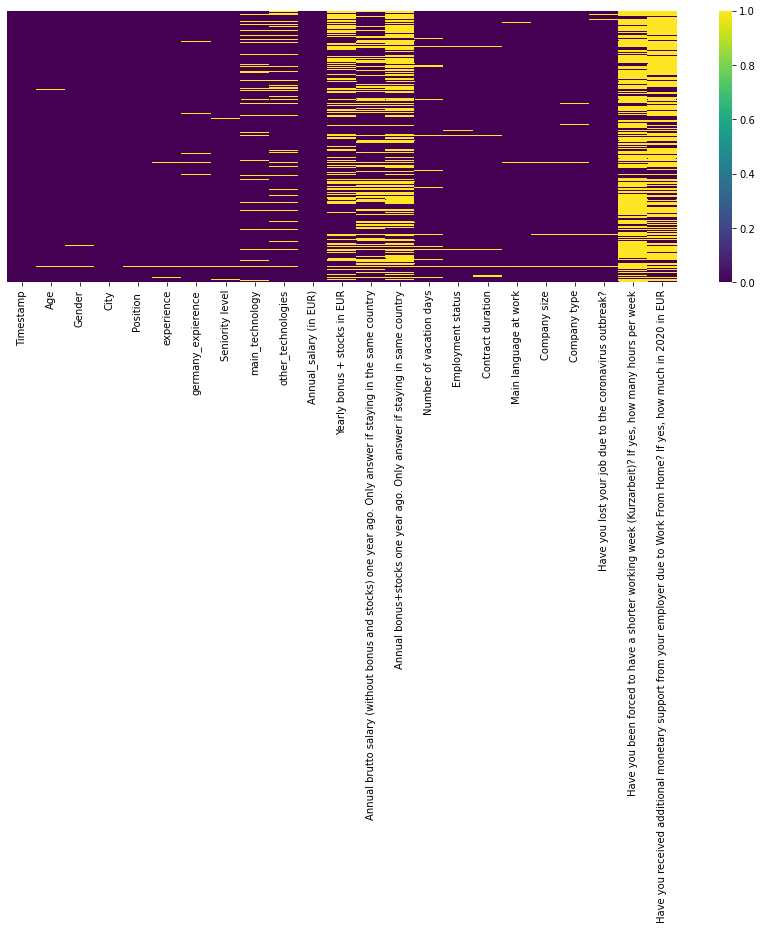

In [8]:
plt.figure(figsize=(15,5))
sns.heatmap(surv_data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

<font color = 'red'> There are few columns which have a very huge amount of missing values, like annual bonus and stocks, but this information is not imporatant for us in the analysis so this data can be deleted. </font>

In [9]:
surv_data.drop(surv_data.columns[[11,12,13,20,21,22]],axis=1,inplace=True)
surv_data

,Timestamp,Age,Gender,City,Position,experience,germany_expierence,Seniority level,main_technology,other_technologies,Annual_salary (in EUR),Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,30,Full-time employee,Unlimited contract,English,51-100,Product
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,29,Full-time employee,Unlimited contract,English,101-1000,Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,26,Full-time employee,Unlimited contract,English,51-100,Product
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,60000.0,unlimited,Full-time employee,Unlimited contract,English,1000+,Product
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,27,Full-time employee,Unlimited contract,German,101-1000,Product


In [10]:
surv_data.isnull().sum()

Timestamp                    0
Age                         27
Gender                      10
City                         0
Position                     6
experience                  16
germany_expierence          32
Seniority level             12
main_technology            127
other_technologies         157
Annual_salary (in EUR)       0
Number of vacation days     68
Employment status           17
Сontract duration           29
Main language at work       16
Company size                18
Company type                25
dtype: int64

<font color = 'red'> We have successfuly eliminated huge amounts of missing data. We can now perform the further analysis on the dataframe. </font>

In [11]:
surv_data['Seniority level'].unique()

array(['Senior', 'Lead', 'Junior', 'Middle', 'Head', nan, 'No level',
       'VP', 'Manager', 'Work Center Manager', 'CTO', 'No level ',
       'Director', 'Key', 'C-level executive manager', 'Principal',
       'intern', 'Student', 'no idea, there are no ranges in the firm ',
       'C-Level', 'Working Student', 'Entry level', 'Intern', 'student',
       'Self employed'], dtype=object)

In [12]:
def remove_duplicate(row):
    if row['Seniority level'] == 'No level ': 
        return 'No level'
    elif row['Seniority level'] == 'intern':
        return 'Intern'
    elif row['Seniority level'] == 'student':
        return 'Student'
    elif row['Seniority level'] == 'C-level executive manager':
        return 'C-Level'
    elif row['Seniority level'] == 'Working Student':
        return 'Student'
    elif row['Seniority level'] == 'no idea, there are no ranges in the firm ':
        return 'No level'
    else: 
        return row['Seniority level']

<font color='red'> we create a function where we replace the similar values like student and intern which have only a difference of capital letter. Some values have the same meaning but as this is a survey, they are inputed in a different way so we identify them and replace them with one single value </font> 

In [13]:
surv_data['Seniority level'] = surv_data.apply (remove_duplicate, axis=1)

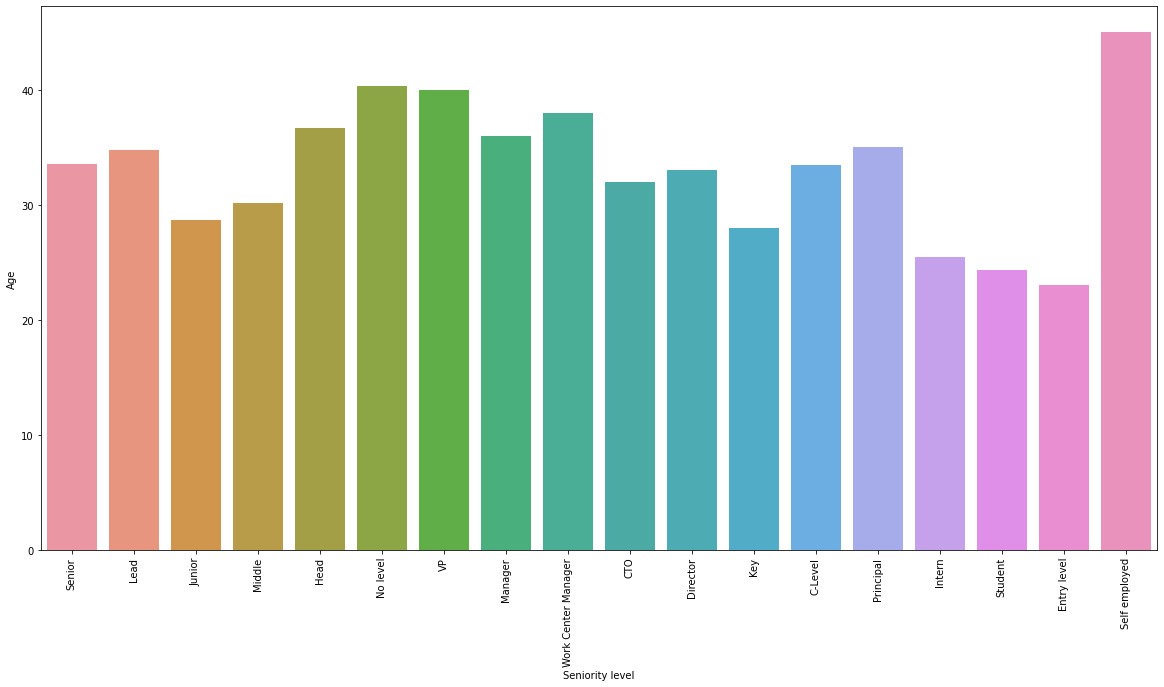

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(data=surv_data,x='Seniority level', y='Age',ci=False)
plt.xticks(rotation=90);

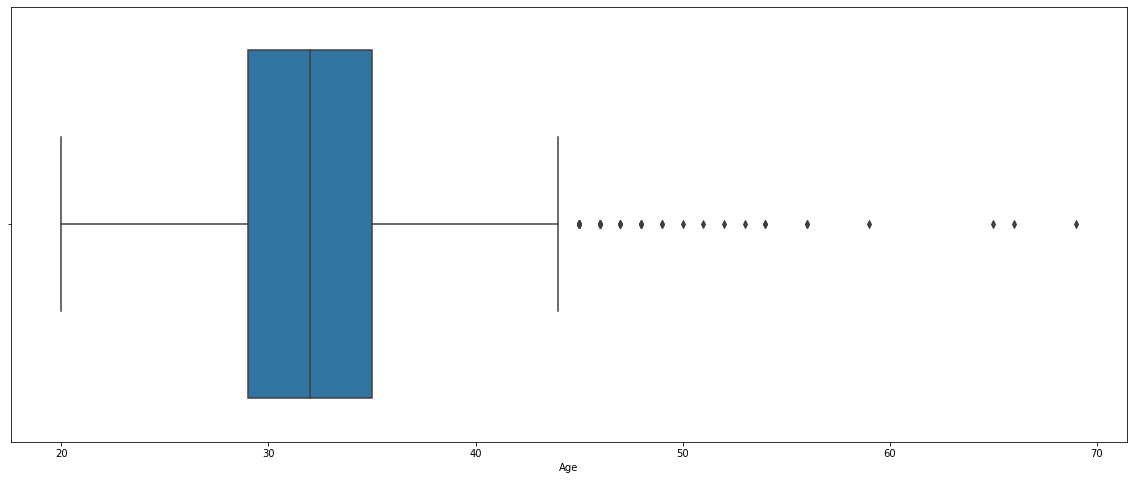

In [15]:
plt.figure(figsize=(20,8))
sns.boxplot(data=surv_data, x='Age');

In [33]:
surv_data['experience'].unique()

array(['5', '7', '12', '4', '17', '6', '8', '15', '2', '25', nan, '14',
       '11', '18', '13', '30', '10', '3', '40', '26', '23', '9', '19',
       '20', '5.5', '22', '16', '0.8', '1', '1.5', '6.5', '21', '7.5',
       '2.5', '28', '29', '1,5', '24', '0', '4.5', '27',
       '1 (as QA Engineer) / 11 in total', '2,5', '15, thereof 8 as CTO',
       '31', '6 (not as a data scientist, but as a lab scientist)', '383',
       '3.5', 'less than year'], dtype=object)

In [42]:
def set_experience(row):
    if row['experience'] in ['1 (as QA Engineer) / 11 in total', '2,5','3.5','less than year','0', '4.5', '0.8', '1', '1.5','3','2.5','4','2','3']:
        return '0 - 4'
    elif row['experience'] in ['7', '4', '6', '8', '2','10', '3', '9','5', '5.5','6 (not as a data scientist, but as a lab scientist)','6.5', '7.5',]:
        return '5 - 10'
    elif row['experience'] in ['12', '17', '15', '14','11', '18', '13', '19','16', '15, thereof 8 as CTO']:
        return '11 - 19'
    elif row['experience'] in ['25','26', '23','20', '22', '21', '28', '29','24', '27']:
        return '20 - 29'
    elif row['experience'] in ['30', '40', '31','383']:
        return 'more than 30'

In [44]:
surv_data['experience'] = surv_data.apply(set_experience,axis=1)

<AxesSubplot:xlabel='Age', ylabel='experience'>

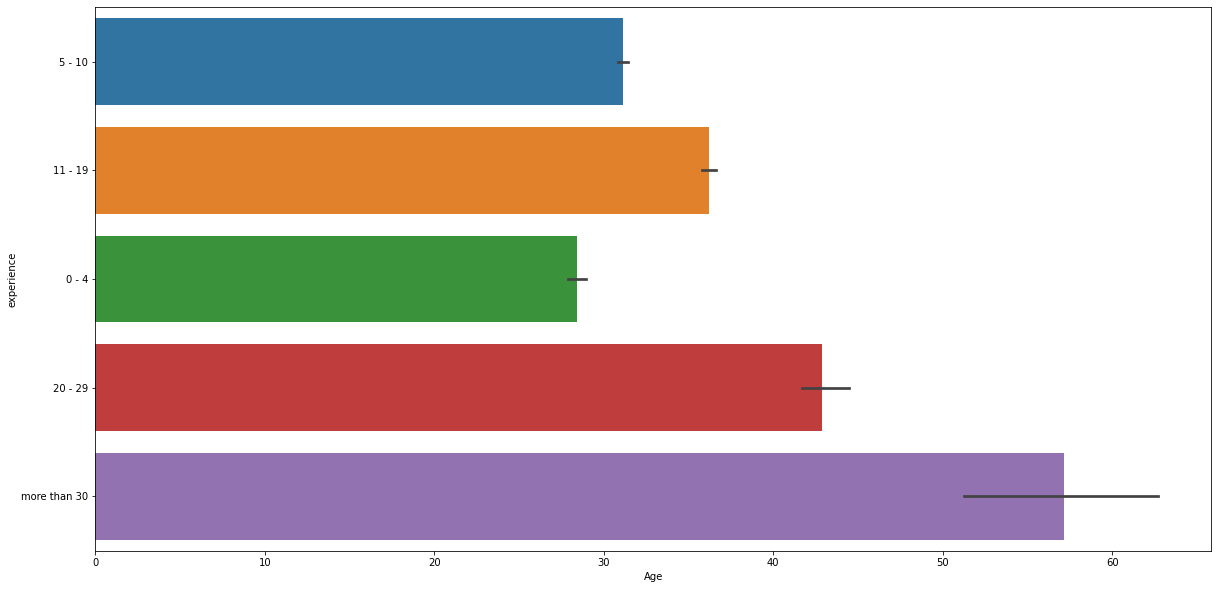

In [64]:
plt.figure(figsize=(20,10))
sns.barplot(data=surv_data,y='experience', x='Age')

<AxesSubplot:xlabel='Company size', ylabel='count'>

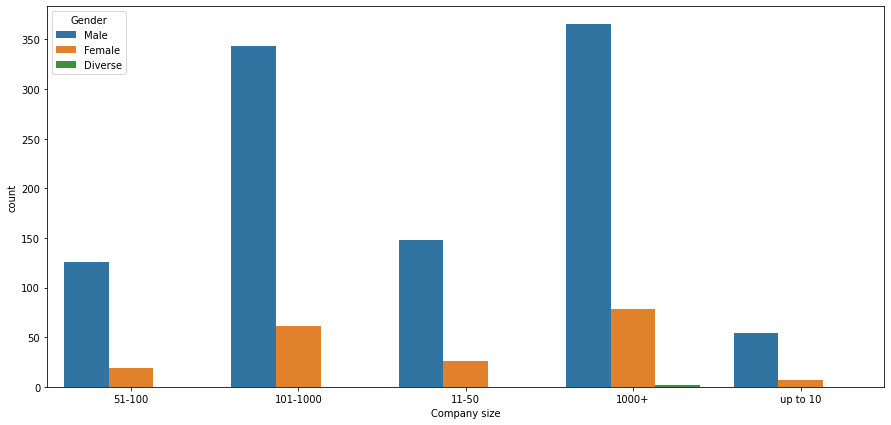

In [65]:
plt.figure(figsize=(15,7))
sns.countplot(data=surv_data, x='Company size',hue='Gender')

<AxesSubplot:xlabel='Main language at work', ylabel='count'>

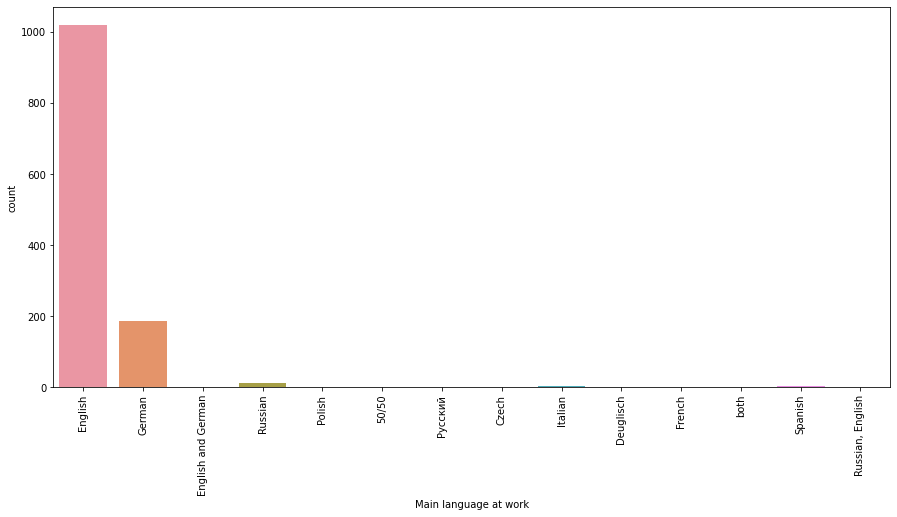

In [67]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.countplot(data=surv_data, x='Main language at work')